In [1]:
import pandas as pd


In [2]:
df = pd.read_excel("A1_data.xlsx")

In [3]:
df.head()

,datetime,g1_var_1,g1_var_2,g1_var_3,g2_var_1,g2_var_2,g2_var_3,g2_var_4,g3_var_1,g3_var_2,...,g5_var_12,g6_var_1,g6_var_2,g6_var_3,g6_var_4,g6_var_5,g6_var_6,g6_var_7,g6_var_8,g6_var_9
0,2021-01-12 11:30:00,0.993166,0.159492,-1.144874,1.349587,0.613303,-0.117983,-0.831034,-0.378628,-0.297294,...,-0.752394,-0.039163,0.876681,0.058753,-0.268879,1.377091,2.070722,-4.173649,-0.473887,0
1,2021-01-12 11:45:00,0.993166,0.204693,-1.144874,1.636380,0.673974,-0.056986,-0.831034,-0.900126,-0.904753,...,-0.787383,-0.133241,0.876681,-0.037700,-0.122859,0.916915,2.070722,-4.173649,-0.473887,0
2,2021-01-12 12:00:00,0.993166,0.207922,-1.123717,1.488963,0.552632,-0.117983,-0.831034,0.208057,0.370911,...,-0.787383,-0.133241,0.656532,-0.037700,0.655914,0.916915,2.070722,-4.173649,-0.473887,0
3,2021-01-12 12:15:00,0.993166,0.245052,-1.123717,1.424636,0.734646,-0.056986,-0.831034,-0.509002,-0.540277,...,-0.787383,-0.133241,0.762811,-0.037700,0.169181,1.377091,2.070722,-4.173649,-0.473887,0
4,2021-01-12 12:30:00,0.993166,0.230523,-1.166031,1.202170,0.673974,0.004010,-0.831034,-0.704564,-0.722515,...,-0.787383,-0.133241,0.702080,-0.037700,0.023161,0.916915,2.070722,-4.173649,-0.473887,0


In [4]:
# to check the total missing values in the dataframe
df['g4_var_2'].isnull().sum()

21

#### there are 21 missing values in g4_var_2 variable which is our dependant variable. we will be plotting its distribution plot to see the data distribution

d:\users\user\anaconda3\envs\project1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\users\user\anaconda3\envs\project1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='g4_var_2', ylabel='Density'>

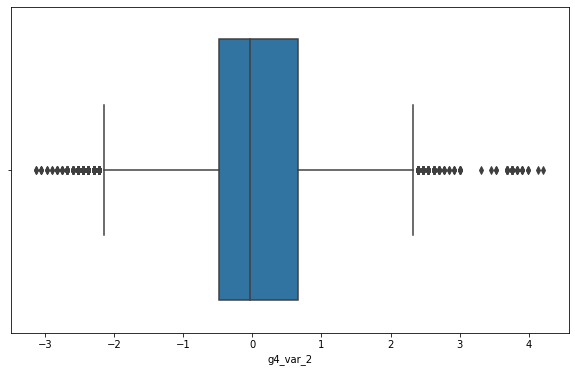

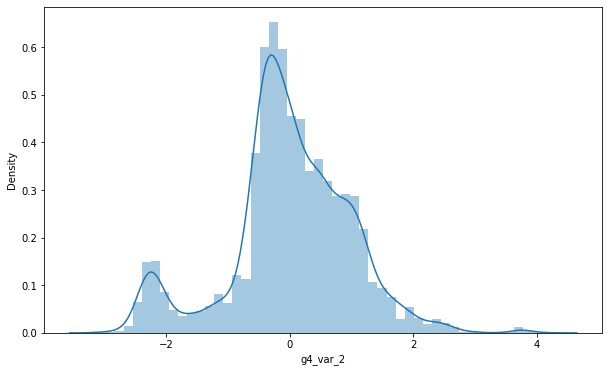

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(df['g4_var_2'])

fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(df['g4_var_2'])

In [7]:
df['g4_var_2'].describe()

count    15478.000000
mean         0.001994
std          0.998325
min         -3.125389
25%         -0.479413
50%         -0.025818
75%          0.654576
max          4.207743
Name: g4_var_2, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='g4_var_2'>

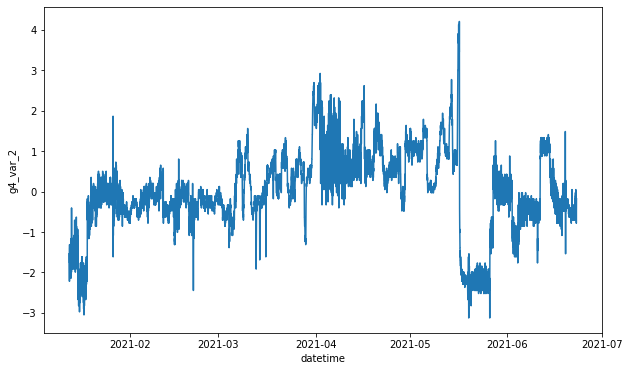

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data=df, x="datetime", y="g4_var_2")

since the data is likely to be symmetry 
we will be using mean value to replace the missing values for the imputation method

In [9]:
g4_var_2_mean =  df['g4_var_2'].mean() #defining mean values for that column
print("mean : ", g4_var_2_mean)

df['g4_var_2'].fillna(g4_var_2_mean , inplace = True) 

print("no of missing values :" , df['g4_var_2'].isnull().sum()) #checking if null values still exist

mean :  0.001993635417346539
no of missing values : 0


## Exploratory data analysis and Data Wrangling

In [10]:
df1 = df.iloc[:, 1:15]

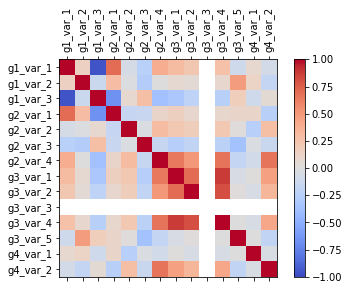

In [11]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

In [12]:
df1.corr() # need to show just last row

,g1_var_1,g1_var_2,g1_var_3,g2_var_1,g2_var_2,g2_var_3,g2_var_4,g3_var_1,g3_var_2,g3_var_3,g3_var_4,g3_var_5,g4_var_1,g4_var_2
g1_var_1,1.000000,0.140365,-0.959088,0.700026,-0.056745,-0.239773,0.397241,0.299754,0.223763,NaN,0.266464,-0.109014,0.073707,-0.077962
g1_var_2,0.140365,1.000000,-0.129512,0.294336,-0.017056,-0.278302,-0.006257,0.062121,0.043649,NaN,0.078792,0.481678,0.119921,-0.174066
g1_var_3,-0.959088,-0.129512,1.000000,-0.667865,0.072848,0.285026,-0.367562,-0.325390,-0.208569,NaN,-0.246200,0.166988,-0.106801,0.053432
g2_var_1,0.700026,0.294336,-0.667865,1.000000,-0.168037,-0.146048,0.107207,0.154968,0.082159,NaN,0.089146,0.106307,0.107881,-0.247529
g2_var_2,-0.056745,-0.017056,0.072848,-0.168037,1.000000,-0.027345,0.303277,0.212390,0.176544,NaN,0.218702,0.015529,-0.257461,0.287173
g2_var_3,-0.239773,-0.278302,0.285026,-0.146048,-0.027345,1.000000,-0.155831,-0.260318,-0.186511,NaN,-0.226042,-0.366161,-0.028034,-0.135477
g2_var_4,0.397241,-0.006257,-0.367562,0.107207,0.303277,-0.155831,1.000000,0.643322,0.503283,NaN,0.667249,-0.179084,-0.081284,0.670247
g3_var_1,0.299754,0.062121,-0.325390,0.154968,0.212390,-0.260318,0.643322,1.000000,0.701182,NaN,0.879530,-0.052928,0.002212,0.462113
g3_var_2,0.223763,0.043649,-0.208569,0.082159,0.176544,-0.186511,0.503283,0.701182,1.000000,NaN,0.805224,0.013978,-0.051673,0.336584
g3_var_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


based on the correlation between g4_var_2 and the remaining features, we will exclude the features that has correlation value below absolute value of 0.1
thus g1_var_1 , g1_var_3, g3_var_3 and g4_var_1 will be excluded from the features

next we will plot the boxplot for the remaining independent variable

<AxesSubplot:>

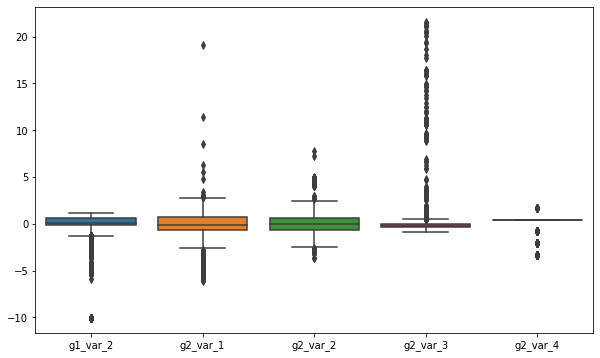

In [13]:
#plotting Stage 1 Data 
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df.iloc[:, [2,4,5,6,7]])

1. abundance of outlier observed in all 5 boxplots
2. there exist extremes outlier which is separated from other observation
3. categorical variable on g2_var_4

<AxesSubplot:>

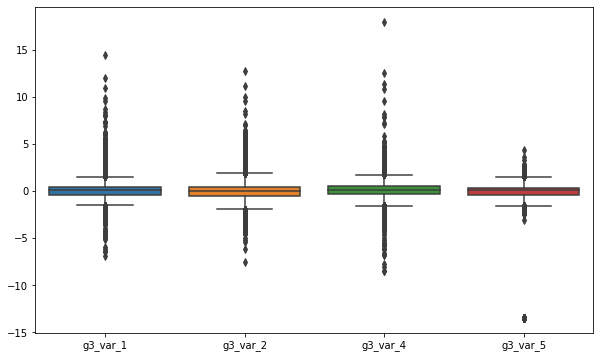

In [13]:
#plotting Stage 2 Data 
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df.iloc[:, [8,9,11,12]])

In [14]:
df1 = df.iloc[:,[0,2,4,5,6,7,8,9,11,12,14]]

In [15]:
X = df1.loc[:,['g1_var_2', 'g2_var_1', 'g2_var_2', 'g2_var_3',
       'g2_var_4', 'g3_var_1', 'g3_var_2', 'g3_var_4', 'g3_var_5']]

In [16]:
y = df1.loc[:,'g4_var_2']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#splitting test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12399, 9)
(3100, 9)
(12399,)
(3100,)


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

In [20]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

print("Predictions: ", predictions_lr)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictions_lr))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictions_lr))

coefs = pd.DataFrame(
    {
        "Features" : X_train.columns.to_list(),
        "Co-efficient" : model_lr.coef_
    }
)

coefs.sort_values(by = "Co-efficient", ascending = False)

Predictions:  [-0.02965344  0.15725777  0.25042063 ...  0.62856163 -2.25410257
 -0.22494942]
Mean squared error: 0.39
Coefficient of determination: 0.61


,Features,Co-efficient
4,g2_var_4,0.682175
5,g3_var_1,0.281330
6,g3_var_2,0.049730
2,g2_var_2,0.022944
8,g3_var_5,0.002567
3,g2_var_3,-0.087344
0,g1_var_2,-0.097193
7,g3_var_4,-0.307685
1,g2_var_1,-0.319619


In [21]:
plot_df = pd.DataFrame(
{
    "actual" : y_test,
    "predicted" : predictions_lr,

})

plot_df.loc[plot_df['actual'] <= 0.1428, 'act_category'] = 'Optimal' 
plot_df.loc[plot_df['actual'] >= -1.8572, 'act_category'] = 'Optimal'
plot_df.loc[plot_df['actual'] > 0.1428, 'act_category'] = 'Non-Optimal' 
plot_df.loc[plot_df['actual'] < -1.8572, 'act_category'] = 'Non-Optimal'

plot_df.loc[plot_df['predicted'] <= 0.1428, 'pred_category'] = 'Optimal' 
plot_df.loc[plot_df['predicted'] >= -1.8572, 'pred_category'] = 'Optimal'
plot_df.loc[plot_df['predicted'] > 0.1428, 'pred_category'] = 'Non-Optimal' 
plot_df.loc[plot_df['predicted'] < -1.8572, 'pred_category'] = 'Non-Optimal'


In [22]:
plot_df = plot_df.join(df1['datetime'])

In [23]:
plot_df = plot_df.set_index('datetime').sort_index()
plot_df

,actual,predicted,act_category,pred_category
datetime,,,,
2021-01-12 11:30:00,0.001994,-0.938307,Optimal,Optimal
2021-01-12 12:15:00,0.001994,-0.968926,Optimal,Optimal
2021-01-12 12:30:00,0.001994,-0.888505,Optimal,Optimal
2021-01-12 14:45:00,0.001994,-1.012672,Optimal,Optimal
2021-01-12 15:30:00,0.001994,-0.885793,Optimal,Optimal
...,...,...,...,...
2021-06-22 19:30:00,-0.328215,-0.322998,Optimal,Optimal
2021-06-22 20:15:00,-0.630612,-0.393013,Optimal,Optimal
2021-06-22 21:30:00,-0.403814,-0.364503,Optimal,Optimal


In [24]:
plot_df[plot_df.pred_category == "Optimal"].describe()

,actual,predicted
count,1390.000000,1390.000000
mean,-0.400940,-0.292846
std,0.628797,0.432624
min,-3.125389,-1.834195
25%,-0.611712,-0.524247
50%,-0.328215,-0.146836
75%,-0.101417,0.028476
max,3.451750,0.141840


In [25]:
plot_df[plot_df.act_category == "Optimal"].describe()

,actual,predicted
count,1595.000000,1595.000000
mean,-0.388607,-0.094002
std,0.400417,0.490416
min,-1.840201,-2.155217
25%,-0.555013,-0.353529
50%,-0.328215,-0.016625
75%,-0.101417,0.140965
max,0.125381,2.761989


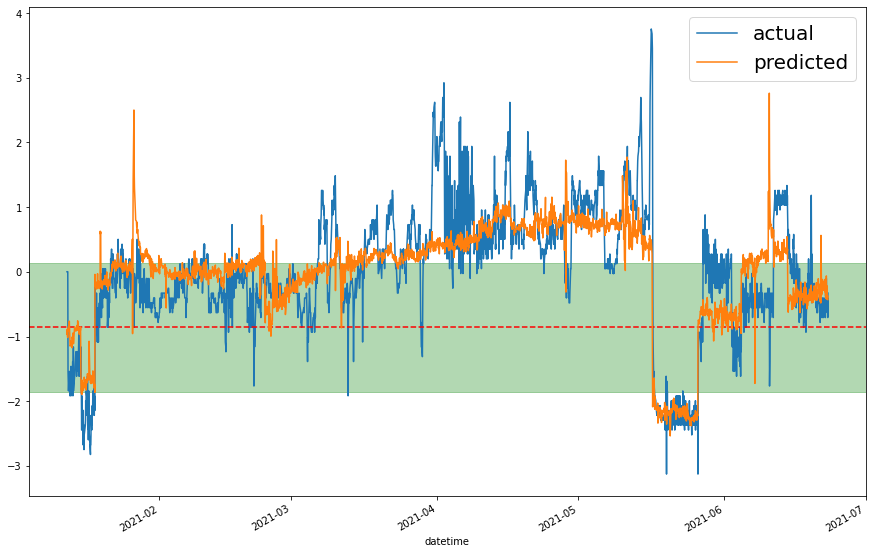

In [26]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(111)

plot_df.sort_index().loc[:,'actual'].plot(ax=ax2)
ax2.axhline(-0.8572,ls='--',color='r')
plot_df.sort_index().loc[:,'predicted'].plot(ax=ax2)

ax2.axhspan(-1.8572,0.1428,alpha=0.3,color='g')
plt.legend(prop={'size': 20})


In [27]:
accuracy = plot_df['pred_category'].value_counts()[1]/plot_df['act_category'].value_counts()[0]

print("the accuracy for optimum category :" , round(accuracy,2)*100 , "%")



the accuracy for optimum category : 87.0 %


In [28]:
plot_df['pred_category'].value_counts()

Non-Optimal    1710
Optimal        1390
Name: pred_category, dtype: int64

In [29]:
plot_df['act_category'].value_counts()[0]

1595

In [30]:
plot_df[plot_df.pred_category == "Optimal"].describe()

,actual,predicted
count,1390.000000,1390.000000
mean,-0.400940,-0.292846
std,0.628797,0.432624
min,-3.125389,-1.834195
25%,-0.611712,-0.524247
50%,-0.328215,-0.146836
75%,-0.101417,0.028476
max,3.451750,0.141840


In [31]:
plot_df[plot_df.act_category == "Optimal"].describe()

,actual,predicted
count,1595.000000,1595.000000
mean,-0.388607,-0.094002
std,0.400417,0.490416
min,-1.840201,-2.155217
25%,-0.555013,-0.353529
50%,-0.328215,-0.016625
75%,-0.101417,0.140965
max,0.125381,2.761989


In [32]:
plot_df['pred_category'].describe()

count            3100
unique              2
top       Non-Optimal
freq             1710
Name: pred_category, dtype: object

In [33]:
rf = RandomForestRegressor(n_jobs=-1)
model_rf = rf.fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)

print("Predictions: ", prediction_rf)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, prediction_rf))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, prediction_rf))

coefs1 = pd.DataFrame(
    {
        "Features" : X_train.columns.to_list(),
        "Importance" : rf.feature_importances_
    }
)

coefs1.sort_values(by = "Importance", ascending = False)

Predictions:  [-0.33804272  0.01047006  0.0921173  ...  0.45045798 -2.07455863
 -0.61776013]
Mean squared error: 0.11
Coefficient of determination: 0.89


,Features,Importance
4,g2_var_4,0.425708
0,g1_var_2,0.148946
1,g2_var_1,0.140708
3,g2_var_3,0.112232
2,g2_var_2,0.047815
8,g3_var_5,0.043361
5,g3_var_1,0.032629
6,g3_var_2,0.030019
7,g3_var_4,0.018581


<AxesSubplot:>

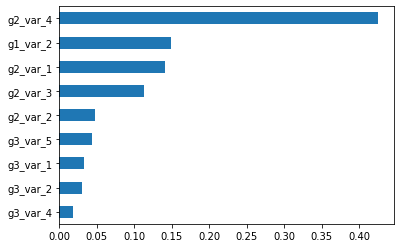

In [34]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind='barh')

In [35]:
plot_df2 = pd.DataFrame(
{
    "actual" : y_test,
    "predicted" : prediction_rf,

})

plot_df2.loc[plot_df2['actual'] <= 0.1428, 'act_category'] = 'Optimal' 
plot_df2.loc[plot_df2['actual'] >= -1.8572, 'act_category'] = 'Optimal'
plot_df2.loc[plot_df2['actual'] > 0.1428, 'act_category'] = 'Non-Optimal' 
plot_df2.loc[plot_df2['actual'] < -1.8572, 'act_category'] = 'Non-Optimal'

plot_df2.loc[plot_df2['predicted'] <= 0.1428, 'pred_category'] = 'Optimal' 
plot_df2.loc[plot_df2['predicted'] >= -1.8572, 'pred_category'] = 'Optimal'
plot_df2.loc[plot_df2['predicted'] > 0.1428, 'pred_category'] = 'Non-Optimal' 
plot_df2.loc[plot_df2['predicted'] < -1.8572, 'pred_category'] = 'Non-Optimal'



# sns.scatterplot(data=plot_df1, x="Y-Actual", y="Predicted Values")

In [36]:
plot_df2 = plot_df2.join(df1['datetime'])

In [37]:
plot_df2 = plot_df2.set_index('datetime').sort_index()
plot_df2

,actual,predicted,act_category,pred_category
datetime,,,,
2021-01-12 11:30:00,0.001994,-0.044835,Optimal,Optimal
2021-01-12 12:15:00,0.001994,0.001994,Optimal,Optimal
2021-01-12 12:30:00,0.001994,-0.121468,Optimal,Optimal
2021-01-12 14:45:00,0.001994,-0.172077,Optimal,Optimal
2021-01-12 15:30:00,0.001994,-0.319296,Optimal,Optimal
...,...,...,...,...
2021-06-22 19:30:00,-0.328215,-0.355431,Optimal,Optimal
2021-06-22 20:15:00,-0.630612,-0.494533,Optimal,Optimal
2021-06-22 21:30:00,-0.403814,-0.333507,Optimal,Optimal


In [39]:
plot_df2[plot_df2.pred_category == "Optimal"].describe()

,actual,predicted
count,1578.000000,1578.000000
mean,-0.355626,-0.341240
std,0.453596,0.339214
min,-3.125389,-1.852297
25%,-0.555013,-0.465806
50%,-0.328215,-0.311205
75%,-0.101417,-0.127121
max,1.486168,0.138989


In [40]:
plot_df[plot_df.act_category == "Optimal"].describe()

,actual,predicted
count,1595.000000,1595.000000
mean,-0.388607,-0.094002
std,0.400417,0.490416
min,-1.840201,-2.155217
25%,-0.555013,-0.353529
50%,-0.328215,-0.016625
75%,-0.101417,0.140965
max,0.125381,2.761989


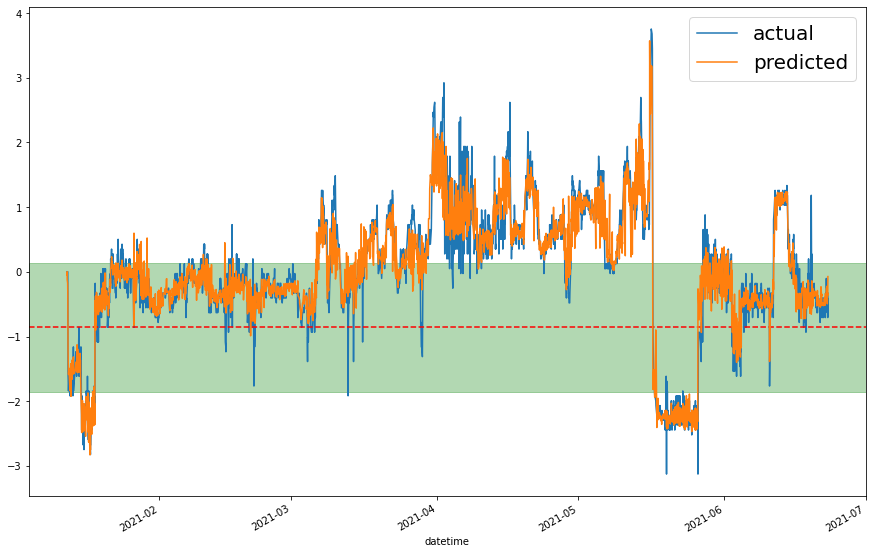

In [41]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(111)

plot_df2.sort_index().loc[:,'actual'].plot(ax=ax2)
ax2.axhline(-0.8572,ls='--',color='r')
plot_df2.sort_index().loc[:,'predicted'].plot(ax=ax2)

ax2.axhspan(-1.8572,0.1428,alpha=0.3,color='g')
plt.legend(prop={'size': 20})


In [349]:
accuracy2 = plot_df2['pred_category'].value_counts()[0]/plot_df2['act_category'].value_counts()[0]

print("the accuracy for optimum category :" , round(accuracy2,2)*100 , "%")

the accuracy for optimum category : 99.0 %


In [350]:
plot_df2['pred_category'].value_counts()

Optimal        1572
Non-Optimal    1528
Name: pred_category, dtype: int64

In [351]:
plot_df2['act_category'].value_counts()

Optimal        1595
Non-Optimal    1505
Name: act_category, dtype: int64

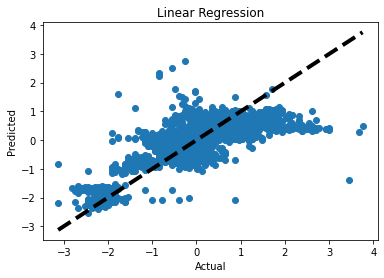

In [362]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Linear Regression")
plt.show()

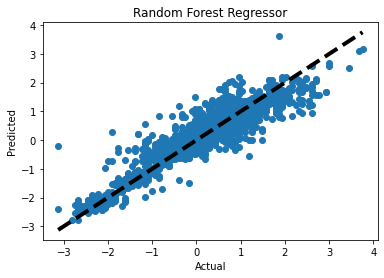

In [363]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction_rf)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Random Forest Regressor")
plt.show()

In [356]:
df3 = df.loc[:,['g4_var_2','g6_var_2', 'g6_var_3', "g6_var_4"]]
df3

,g4_var_2,g6_var_2,g6_var_3,g6_var_4
0,0.001994,0.876681,0.058753,-0.268879
1,0.001994,0.876681,-0.037700,-0.122859
2,0.001994,0.656532,-0.037700,0.655914
3,0.001994,0.762811,-0.037700,0.169181
4,0.001994,0.702080,-0.037700,0.023161
...,...,...,...,...
15494,-0.706211,-0.884506,-0.230605,-0.074186
15495,-0.630612,-0.861732,-0.230605,-0.171533
15496,-0.555013,-0.922463,-0.230605,-0.122859
15497,-0.328215,-0.861732,-0.230605,0.753260


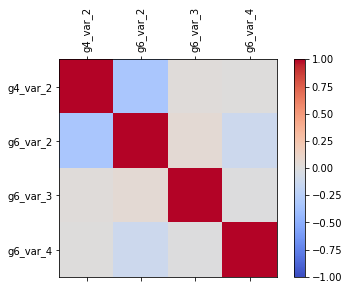

In [357]:
corr2 = df3.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df3.columns)
ax.set_yticklabels(df3.columns)
plt.show()

In [358]:
corr2

,g4_var_2,g6_var_2,g6_var_3,g6_var_4
g4_var_2,1.000000,-0.331757,0.016193,0.002748
g6_var_2,-0.331757,1.000000,0.047785,-0.118458
g6_var_3,0.016193,0.047785,1.000000,-0.006168
g6_var_4,0.002748,-0.118458,-0.006168,1.000000


In [359]:
df4 = df.loc[: ,"g5_var_1":"g5_var_12" ]
df4["g4_var_2"] = df["g4_var_2"]
cols = df4.columns.tolist()
cols = cols[-1:] + cols[:-1]

df4 = df4[cols]

df4.corr()

,g4_var_2,g5_var_1,g5_var_2,g5_var_3,g5_var_4,g5_var_5,g5_var_6,g5_var_7,g5_var_8,g5_var_9,g5_var_10,g5_var_11,g5_var_12
g4_var_2,1.000000,-0.027675,-0.023762,-0.002547,-0.051670,-0.033709,-0.054751,-0.028974,0.023581,-0.036644,-0.074532,-0.003631,-0.015029
g5_var_1,-0.027675,1.000000,0.283952,0.348817,0.557665,0.099490,0.200450,0.144419,-0.017431,-0.020143,0.080997,0.322848,-0.072236
g5_var_2,-0.023762,0.283952,1.000000,0.138846,-0.098593,0.362486,0.229935,0.428837,0.027964,0.368678,-0.120939,0.262703,0.162766
g5_var_3,-0.002547,0.348817,0.138846,1.000000,0.288439,-0.009340,0.209594,-0.046994,0.142573,-0.004479,0.310067,0.394435,-0.207647
g5_var_4,-0.051670,0.557665,-0.098593,0.288439,1.000000,-0.039003,0.072288,0.020224,0.186841,-0.103009,0.378949,0.219576,0.154693
g5_var_5,-0.033709,0.099490,0.362486,-0.009340,-0.039003,1.000000,0.555665,0.307536,0.025676,0.198142,0.112169,-0.116829,0.154085
g5_var_6,-0.054751,0.200450,0.229935,0.209594,0.072288,0.555665,1.000000,-0.003166,-0.055698,0.124197,0.199973,0.141454,0.046736
g5_var_7,-0.028974,0.144419,0.428837,-0.046994,0.020224,0.307536,-0.003166,1.000000,0.080800,0.448063,0.147507,-0.061533,0.285137
g5_var_8,0.023581,-0.017431,0.027964,0.142573,0.186841,0.025676,-0.055698,0.080800,1.000000,0.031379,0.160521,-0.011973,0.088284
g5_var_9,-0.036644,-0.020143,0.368678,-0.004479,-0.103009,0.198142,0.124197,0.448063,0.031379,1.000000,0.113459,0.024267,0.381667


In [360]:
df5 = df.loc[: ,"g6_var_1":"g6_var_8" ]
df5["g4_var_2"] = df["g4_var_2"]
cols = df5.columns.tolist()
cols = cols[-1:] + cols[:-1]

df5 = df5[cols]

df5.corr()

,g4_var_2,g6_var_1,g6_var_2,g6_var_3,g6_var_4,g6_var_5,g6_var_6,g6_var_7,g6_var_8
g4_var_2,1.000000,0.008740,-0.331757,0.016193,0.002748,-0.104944,-0.224299,0.260732,0.039616
g6_var_1,0.008740,1.000000,0.125524,0.011419,0.001434,0.011126,-0.016659,-0.083118,0.059289
g6_var_2,-0.331757,0.125524,1.000000,0.047785,-0.118458,-0.138535,0.112241,-0.423803,0.110309
g6_var_3,0.016193,0.011419,0.047785,1.000000,-0.006168,-0.018440,-0.021423,-0.038307,0.020032
g6_var_4,0.002748,0.001434,-0.118458,-0.006168,1.000000,0.245081,-0.026414,0.051317,0.038777
g6_var_5,-0.104944,0.011126,-0.138535,-0.018440,0.245081,1.000000,0.418307,-0.148964,0.036822
g6_var_6,-0.224299,-0.016659,0.112241,-0.021423,-0.026414,0.418307,1.000000,-0.317127,0.061809
g6_var_7,0.260732,-0.083118,-0.423803,-0.038307,0.051317,-0.148964,-0.317127,1.000000,-0.069036
g6_var_8,0.039616,0.059289,0.110309,0.020032,0.038777,0.036822,0.061809,-0.069036,1.000000


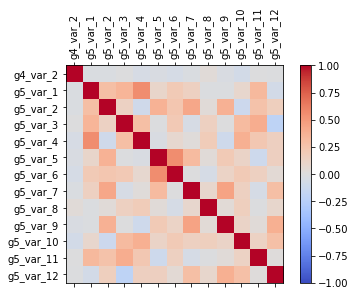

In [361]:
corr3 = df4.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr3,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df4.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df4.columns)
ax.set_yticklabels(df4.columns)
plt.show()